# **<p style="color:red;">About The Dataset :</p>**

<p>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.</p>


<img src= "https://www.pngitem.com/pimgs/m/255-2558137_diabetes-png-pictures-diabetes-png-transparent-png.png" alt ="Titanic" style='width: 600px;'>

[](https://www.google.com/imgres?imgurl=https%3A%2F%2Fcdn-prod.medicalnewstoday.com%2Fcontent%2Fimages%2Farticles%2F323%2F323627%2Fdiabetes.jpg&imgrefurl=https%3A%2F%2Fwww.medicalnewstoday.com%2Farticles%2F323627&tbnid=8Uh9XWHpI-PPHM&vet=12ahUKEwi3k7u7ppHwAhXnDLcAHYrgCNIQMygAegUIARDQAQ..i&docid=F90ufqoDOf6rXM&w=1100&h=734&q=diabetes&ved=2ahUKEwi3k7u7ppHwAhXnDLcAHYrgCNIQMygAegUIARDQAQ)

# **<p style="color:red;">About The Data :</p>**


1. Pregnancies - Number of times pregnant

2. Glucose - Plasma glucose concentration 

3. BloodPressure - Diastolic blood pressure (mm Hg)

4. SkinThickness - Triceps skin fold thickness (mm)

5. Insulin - 2-Hour serum insulin (mu U/ml)

6. BMI - Body mass index

7. DiabetesPedigreeFunction - Diabetes pedigree function

8. Age - Age (years)

9. Outcome - Class variable (0 or 1) - (Target variable)


# **<p style="color:red;">Aim?</p>**


Building a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?



# 1. Importing The Modules

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

# 2. Reading The Dataset and Creating DataFrame

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

diabetes = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")


/kaggle/input/pima-indians-diabetes-database/diabetes.csv


## 3. Analyzing the Data

**3.1 Checking Initial 10 Records of the DataFrame**

In [3]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**3.2 Checking The Number Of Rows and Columns In DataFrame**

In [4]:
print(f"Number of rows in dataframe are : {diabetes.shape[0]} \nNumber of columns in dataframe are : {diabetes.shape[1]} \n")

Number of rows in dataframe are : 768 
Number of columns in dataframe are : 9 



**3.3 Checking The Information Of DataFrame**

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> * 7 columns of type "int".
> * 2 columns of type "float"

**3.4 Checking Statistical Data Of DataFrame**

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**3.5 Checking The Duplicate Rows**

In [7]:
diabetes[diabetes.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


> **0** duplicate rows found in the dataframe.

**3.6 Checking Unique Values In DataFrame**

In [8]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

> * Highest number of unique values are in column DiabetesPedigreeFunction.

**3.7 Checking For The Null Values in DataFrame**

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> **0** null values found

**3.8 Checking Class Distribution**

In [10]:
print("Number of samples for Outcome 0 are : ",len(diabetes[diabetes['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(diabetes[diabetes['Outcome']==1]))


Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


> Classes are **imbalanced**.

# ****4. Data Visualization****

In [11]:
# Add all column names to a list except for the target variable
columns=diabetes.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','w']
print()
print('Colors for the graphs are :',colours)

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Colors for the graphs are : ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'w']


**4.1 Distplot For Various Features**

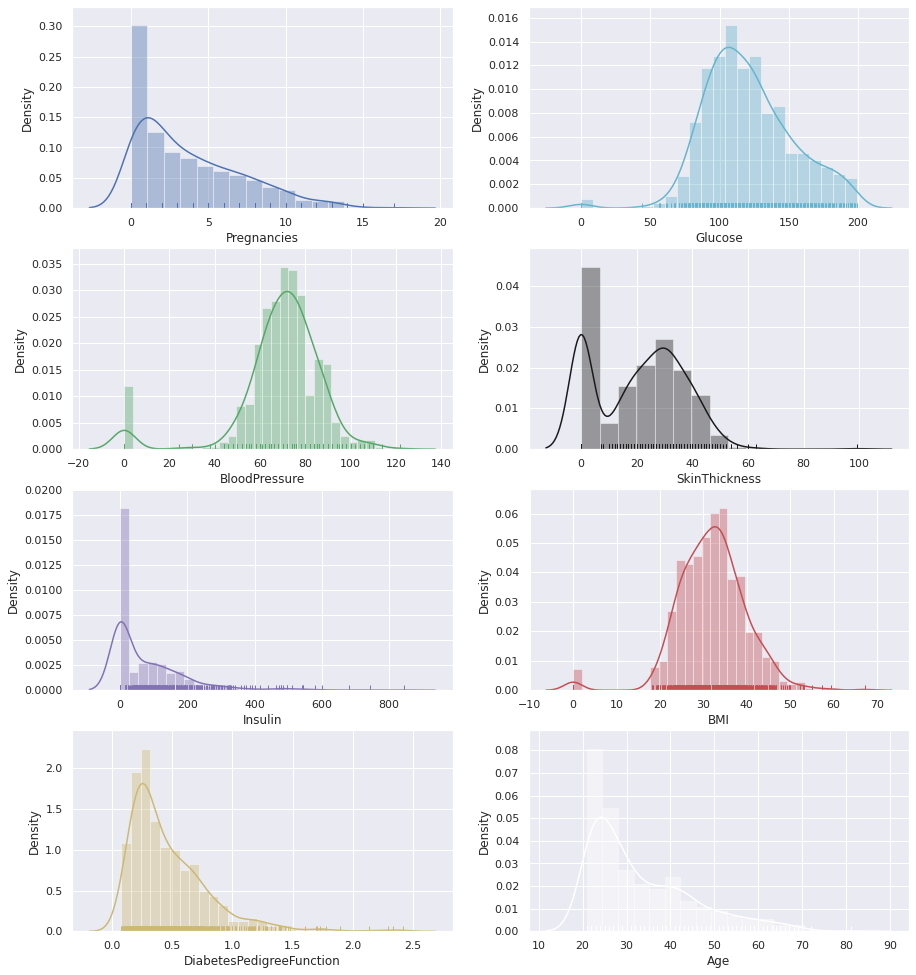

In [12]:
sns.set(rc={'figure.figsize':(15,17)})
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(diabetes[columns[i]], hist=True, rug=True, color=colours[i])

**4.2 ViolinPlot For Outcome Vs. Other Attributes**

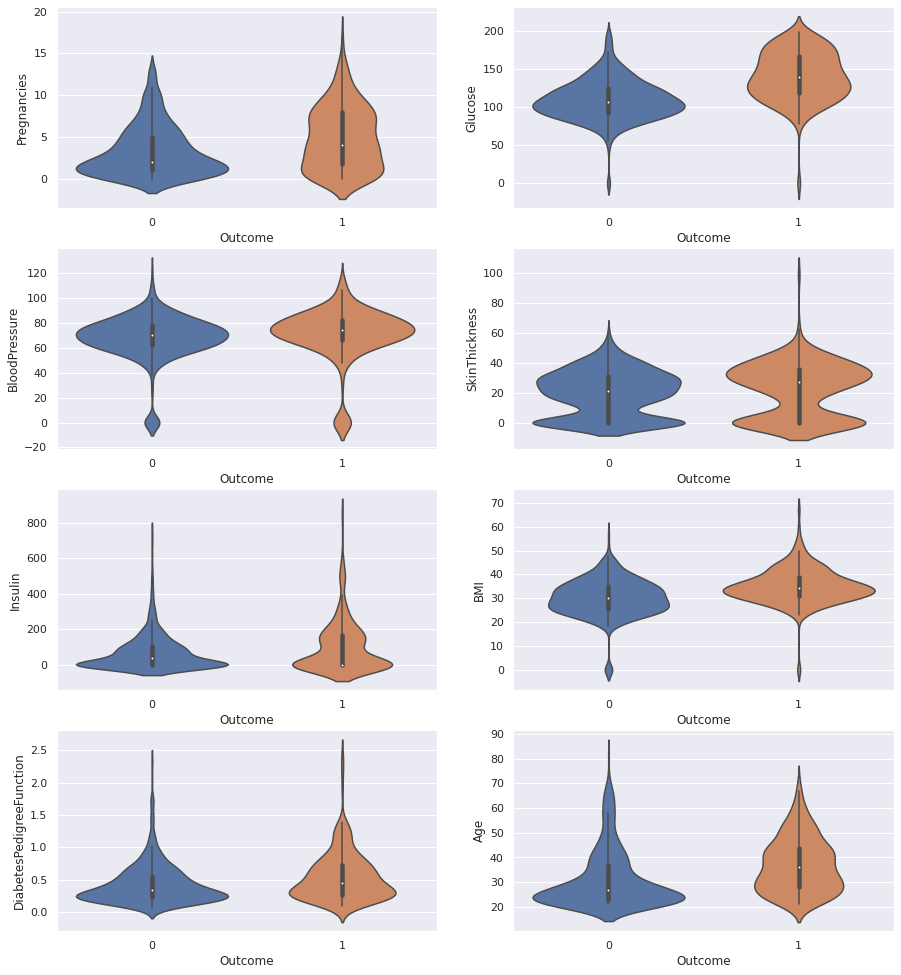

In [13]:
sns.set(rc={'figure.figsize':(15,17)})
j=1
for i in (columns):
    plt.subplot(4,2,j)

    sns.violinplot(x="Outcome", y=i,data=diabetes, kind="violin", split=True, height=4, aspect=.7)
    j=j+1


**4.3 ScatterPlot Of All Attributes Against Each Other**

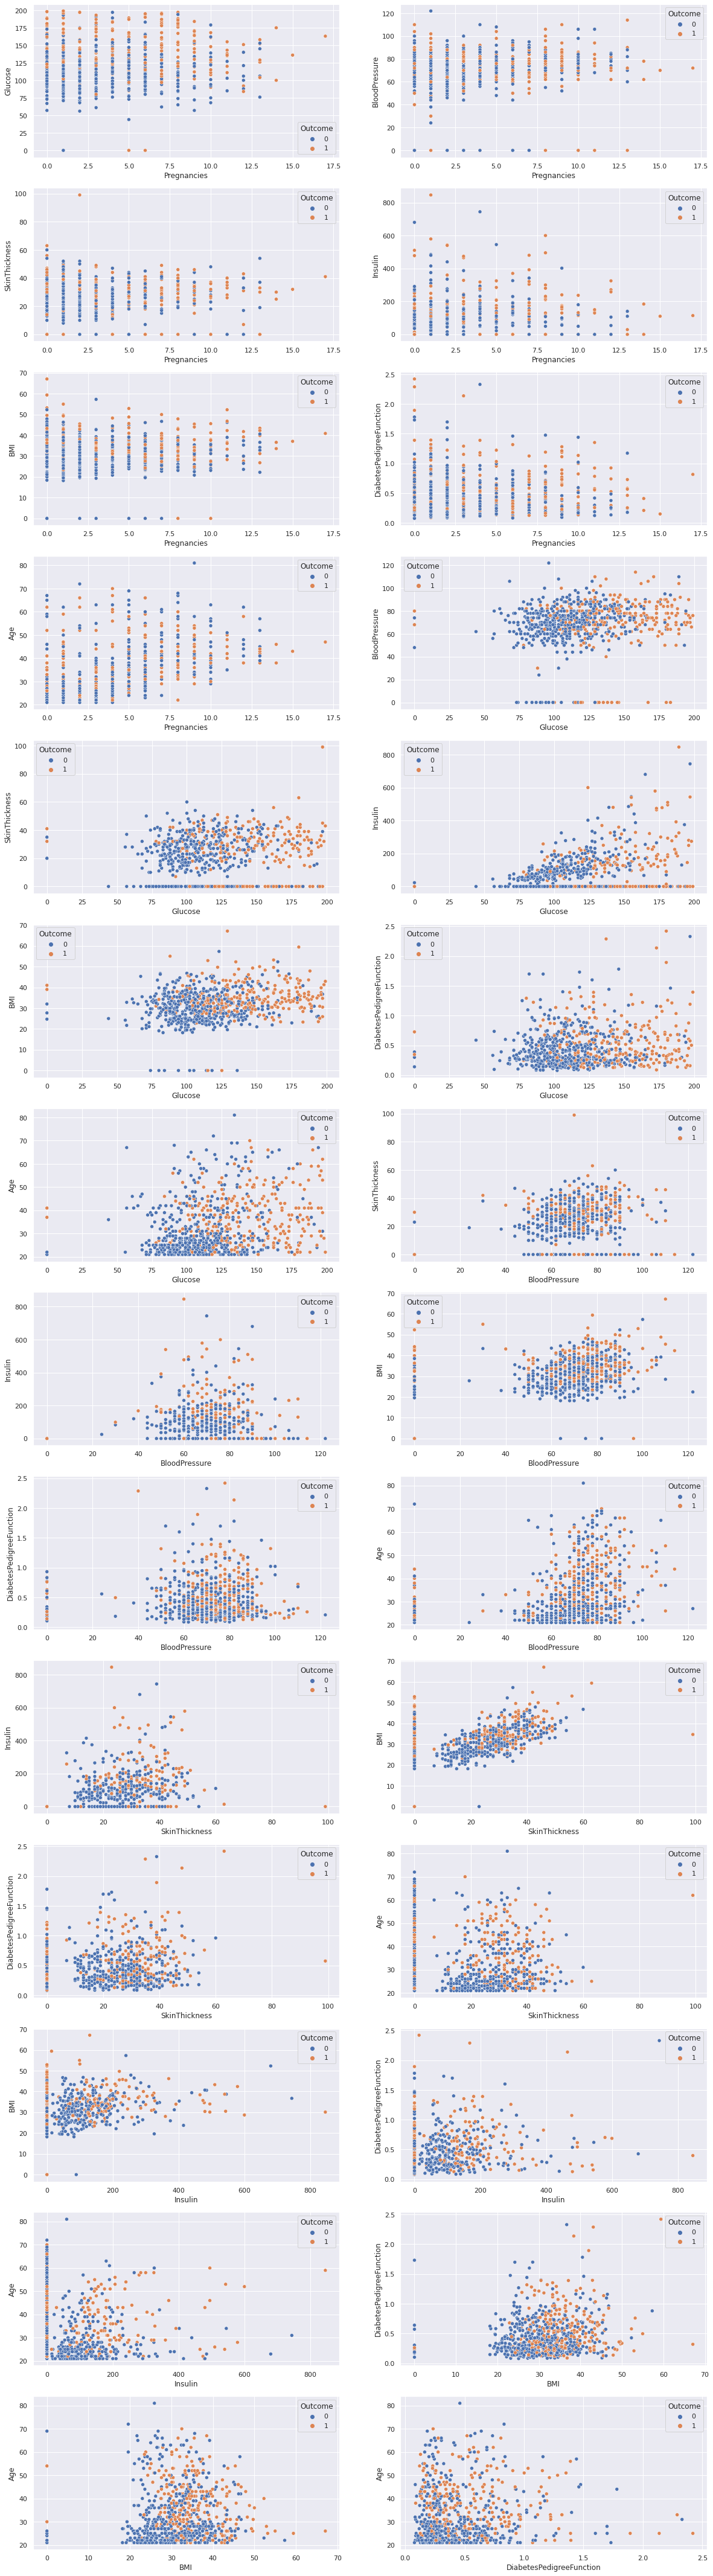

In [14]:
sns.set(rc={'figure.figsize':(20,100)})
j=1
for i in range(len(columns)):
    for k in range(i,len(columns)):
        try:
            if i==k:
                continue
            plt.subplot(18,2,j)
            sns.scatterplot(x=diabetes[columns[i]],y=diabetes[columns[k]],hue="Outcome",data=diabetes)
            j=j+1
        except:
            break

**4.4 Strip Plot Distribution Of Attributes Vs Outcome**

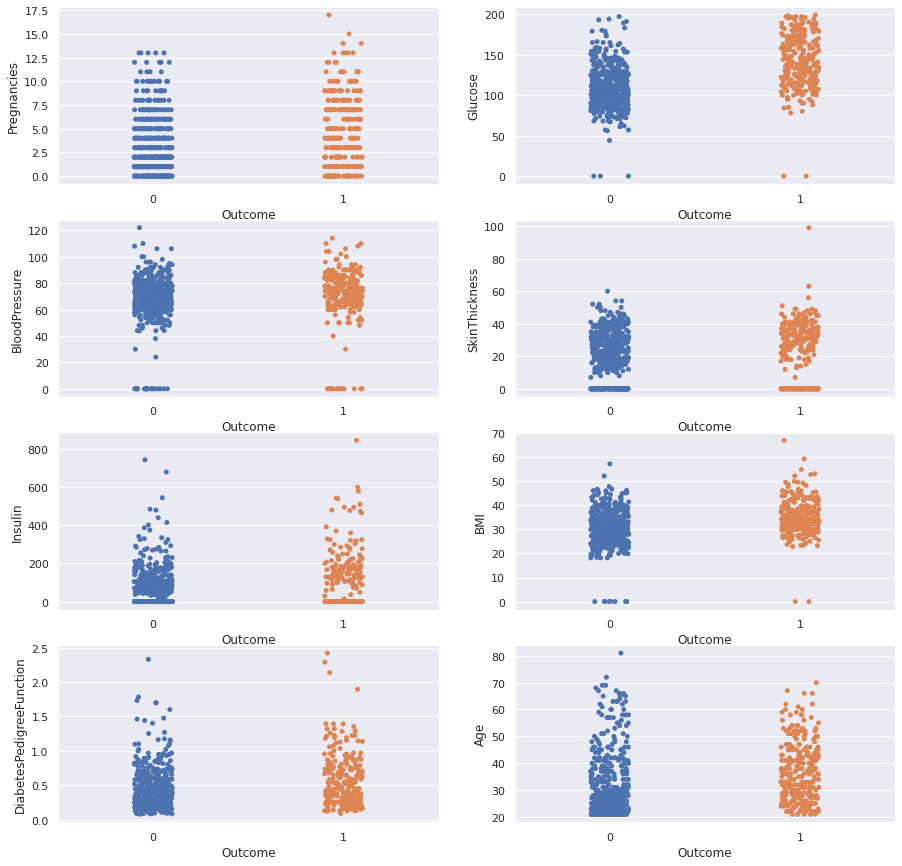

In [15]:
sns.set(rc={'figure.figsize':(15,15)})
j=1
for i in range(len(columns)):
    plt.subplot(4,2,j)
    sns.stripplot(x='Outcome', y=columns[i] , data=diabetes)
    j=j+1

    


**4.5 Plotting The Pair Plot**

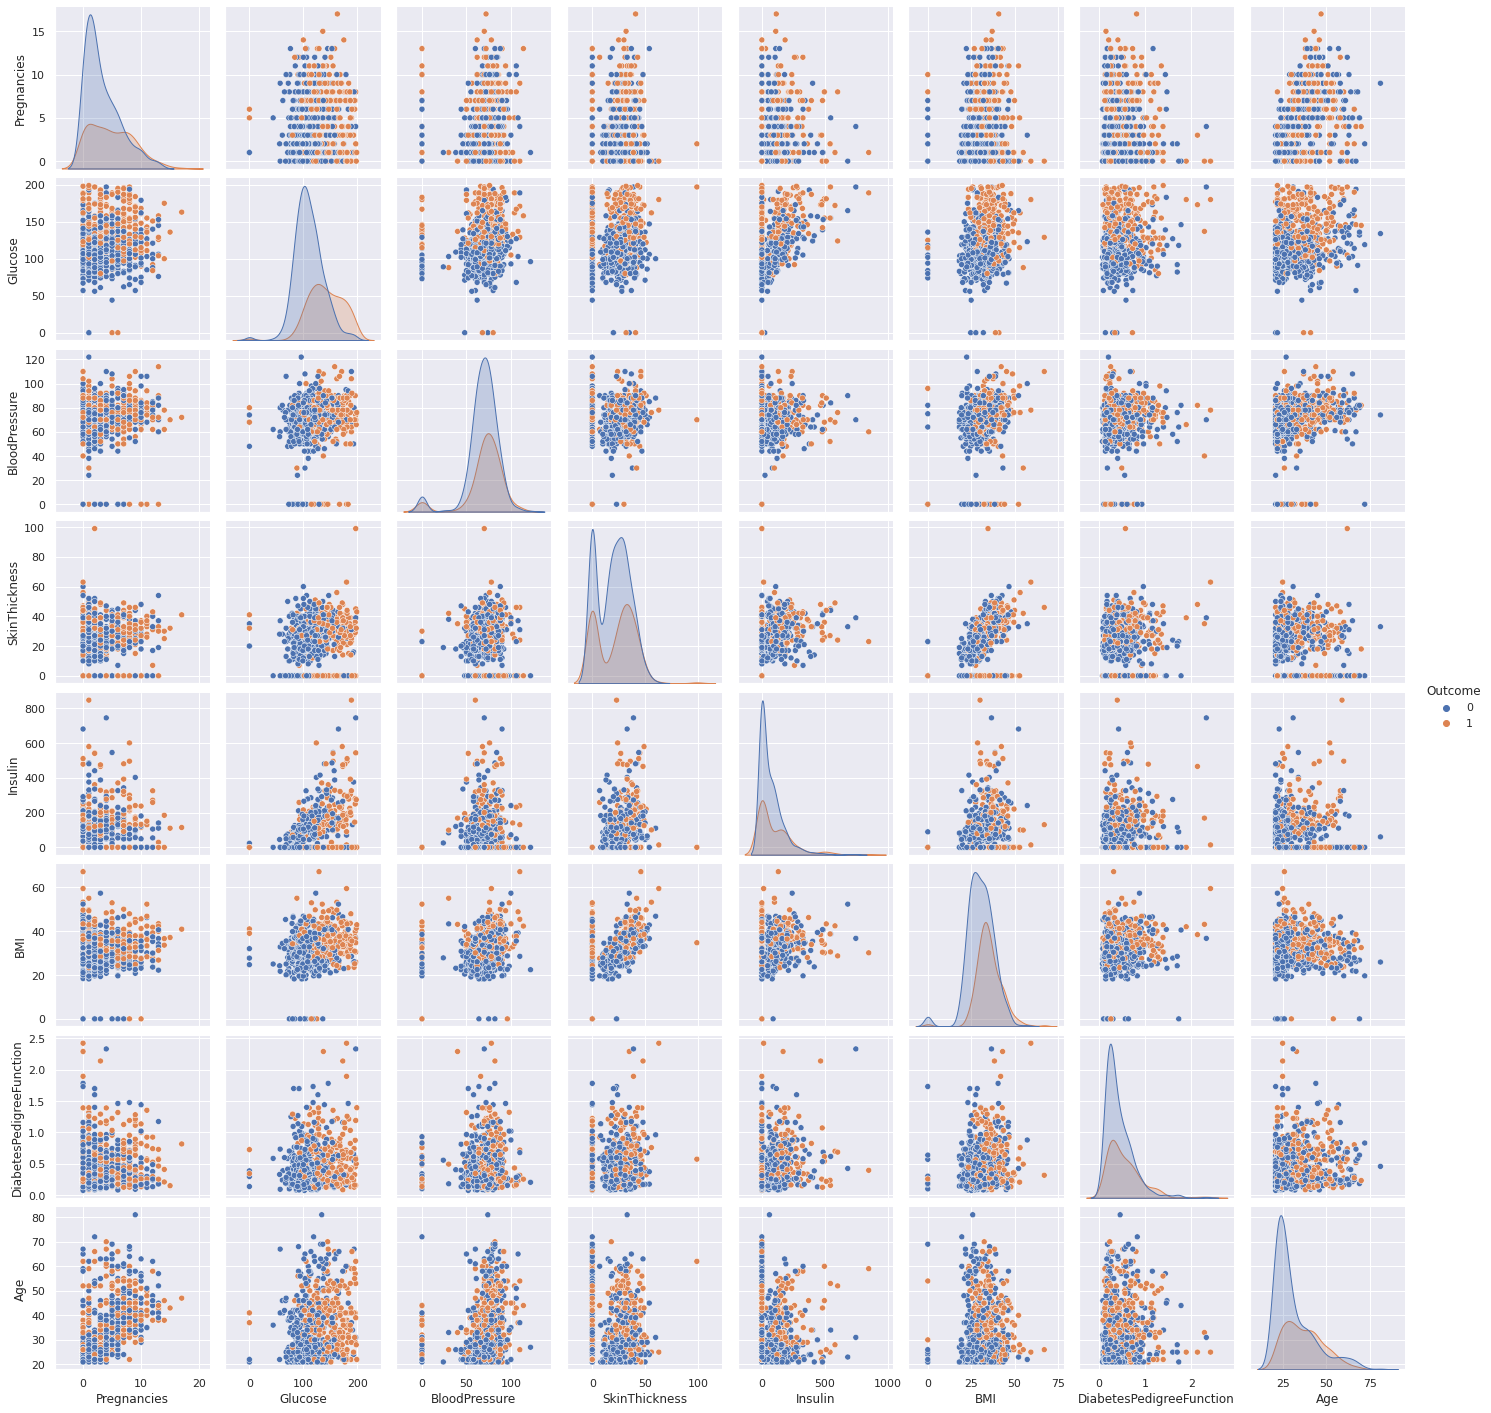

In [16]:
sns.set(rc={'figure.figsize':(15,100)})
sns.pairplot(diabetes, hue='Outcome')


**4.6 HeatMap**

<AxesSubplot:>

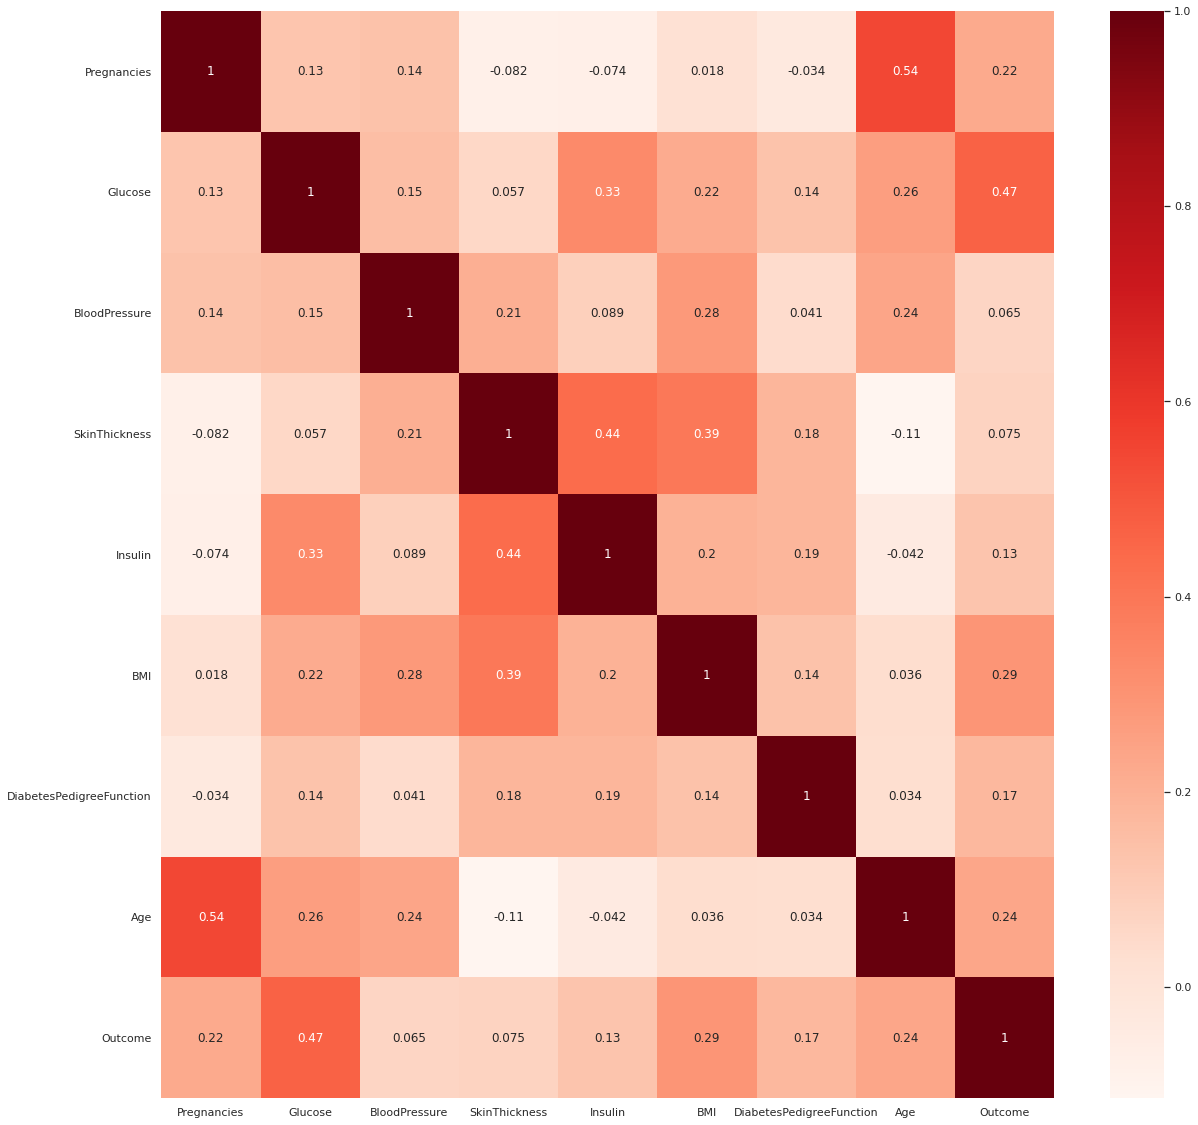

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(diabetes.corr(), cmap='Reds', annot=True)


**4.7 Distribution Of Target Variable**

<AxesSubplot:xlabel='Outcome', ylabel='count'>

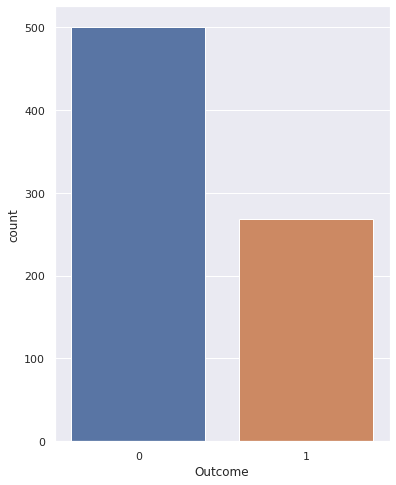

In [18]:
plt.figure(figsize=(6,8))
sns.countplot(diabetes['Outcome'])


# ***5. Data PreProcessing***

**5.1 Feature Engineering**

In [19]:
# Scaling those columns which have values greater than 1

scaleIt = MinMaxScaler()
columns_to_be_scaled = [c for c in diabetes.columns if diabetes[c].max() > 1]
print("The columns which are to be scaled are :",columns_to_be_scaled)

scaled_columns = scaleIt.fit_transform(diabetes[columns_to_be_scaled])
scaled_columns = pd.DataFrame(scaled_columns, columns=columns_to_be_scaled)
scaled_columns['Outcome'] = diabetes['Outcome'] 



#copying the scaled DataFrame to original DataFrame

diabetes=scaled_columns
diabetes

The columns which are to be scaled are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


**5.2 Dividing The Data Into X And Y**

In [20]:
x=diabetes.iloc[:,:-1]
y=diabetes.iloc[:,-1:]
x.head(5),y.head(5)

(   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
 1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
 2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
 3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
 4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
 
    DiabetesPedigreeFunction       Age  
 0                  0.234415  0.483333  
 1                  0.116567  0.166667  
 2                  0.253629  0.183333  
 3                  0.038002  0.000000  
 4                  0.943638  0.200000  ,
    Outcome
 0        1
 1        0
 2        1
 3        0
 4        1)

**5.3 Train Test Split**

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 42)

**5.4 Using SMOTE To Handle Class Imbalance**


In [22]:
print("Percentage of Positive Values in training data before Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of x before applying SMOTE :', x_train.shape)


smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

print('Shape of x after applying SMOTE : ', x_train.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")


Percentage of Positive Values in training data before Smote : 34.69055374592834 %
Percentage of Negative Values in training data before Smote : 65.30944625407166 %

Shape of x before applying SMOTE : (614, 8)
Shape of x after applying SMOTE :  (802, 8)

Percentage of Positive Values in training data after Smote : 50.0 %
Percentage of Negative Values in training data after Smote : 50.0 %


# **6. Building The Models**

**6.1 Logistic Regression**

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Logistic Regression is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicted,)*100, "%")


Confusion Matrix : 
 [[68 31]
 [15 40]]

The accuracy of Logistic Regression is :  70.12987012987013 %

Precision score for Logistic Regression is : 56.33802816901409 %

Recall score for Logistic Regression is : 72.72727272727273 %


**6.2 Gaussian Naive Bayes**


In [24]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test, predicted,)*100, "%")


Confusion Matrix : 
 [[71 28]
 [12 43]]

The accuracy of Gaussian Naive Bayes is :  74.02597402597402 %

Precision score for Gaussian Naive Bayes is : 60.56338028169014 %

Recall score for Gaussian Naive Bayes is : 78.18181818181819 %


**6.3 Bernoulli Naive Bayes**


In [25]:
model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Bernoulli Naive Bayes is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Bernoulli Naive Bayes is :",recall_score(y_test, predicted,)*100, "%")


Confusion Matrix : 
 [[53 46]
 [29 26]]

The accuracy of Bernoulli Naive Bayes is :  51.298701298701296 %

Precision score for Bernoulli Naive Bayes is : 36.11111111111111 %

Recall score for Bernoulli Naive Bayes is : 47.27272727272727 %


**6.4 Support Vector Machine**


In [26]:
model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for SVM is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for SVM is :",recall_score(y_test, predicted,)*100, "%")


Confusion Matrix : 
 [[65 34]
 [16 39]]

The accuracy of SVM is :  67.53246753246754 %

Precision score for SVM is : 53.42465753424658 %

Recall score for SVM is : 70.9090909090909 %


**6.5 K Nearest Neighbours**

In [27]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print()
print ("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test, predicted,)*100, "%")





The accuracy of KNN is :  68.83116883116884 %

Precision score for KNN is : 55.932203389830505 %

Recall score for KNN is : 60.0 %


**6.6 X Gradient Boosting**

In [28]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
predicted = model.predict(x_test)


print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test, predicted,)*100, "%")


[17:27:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

The accuracy of XGBoost is :  72.07792207792207 %

Precision score for XGBoost is : 58.57142857142858 %

Recall score for XGBoost is : 74.54545454545455 %
